<a href="https://colab.research.google.com/github/GousemujeebShaik/Case-Studies/blob/main/RecomenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSIC RECOMMENDATION SYSTEM
We have four datasets namely:

1) kaggle_users.txt: This dataset consists of different users who listen to the song represented by the column 'userid'.

2) kaggle_songs.txt: This dataset consists of different songs with their respective song IDs.

3) kaggle_visible_evaluation_triplets.txt: This dataset consists of three columns namely, Userid , Songid and Freq

4) unique_tracks.txt: This dataset consists of four columns namely,Trackid', 'Songid','ArtistName' and'Release'

In [1]:
 
# Import section Github
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Lets read all the Four DataSets:
1. Users: Where we have all the unique UserID's.
2. Songs: We have list of all the SongID's
3. Triplets: This data set will give the frequency of the Songs listned by user.
4. Unique Track: Will give us the details of the Song Artist and release

In [4]:
df_user = pd.read_csv('data/kaggle_users.txt', sep='\t', names=['userid'])
df_user.head()

,userid
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


In [5]:
df_songs = pd.read_csv('data/kaggle_songs.txt', sep=' ', names=['SongID','Sr.No'])
df_songs.drop('Sr.No', axis=1, inplace=True)
df_songs.head()

,SongID
0,SOAAADD12AB018A9DD
1,SOAAADE12A6D4F80CC
2,SOAAADF12A8C13DF62
3,SOAAADZ12A8C1334FB
4,SOAAAFI12A6D4F9C66


In [6]:
df_triplet = pd.read_csv('data/kaggle_visible_evaluation_triplets.txt', sep='\t', names=['Userid', 'Songid','Freq'])
df_triplet.head()

,Userid,Songid,Freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1.0
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1.0
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1.0
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1.0
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1.0


In [7]:
df_uniquetrack = pd.read_csv('data/unique_tracks.txt', sep='<SEP>', names=['Trackid', 'Songid','ArtistName','Release'])
df_uniquetrack.head()

,Trackid,Songid,ArtistName,Release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


Now that all the Data is available, let's start with the EDA Analysis

Merge both the Triplets and Unique Track dataset on the Song ID columns.

In [8]:
df_merge=pd.merge(df_triplet,df_uniquetrack, how='left')
df_merge.tail()

,Userid,Songid,Freq,Trackid,ArtistName,Release
440148,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOTHQRU12A58A78698,8.0,NaN,NaN,NaN
440149,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOBMYTR12A8C13B2D3,3.0,TRCKHHZ128F4289563,Café Tacvba,Las flores
440150,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOPUUQJ12AF72A5748,8.0,TRGXCED128F92D1428,Creedence Clearwater Revival,Susie Q
440151,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOJQCAO12AB0183B8A,8.0,NaN,NaN,NaN
440152,9eaedf5c861eb8ae71a5042,NaN,NaN,NaN,NaN,NaN


Seaborn Plot to find if any null values.. Also using the isnull() and Sum() methods

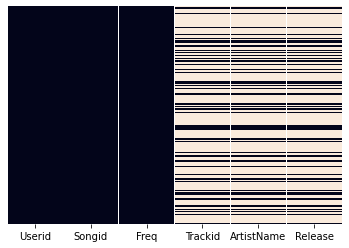

In [9]:
sns.heatmap(df_merge.isnull(),yticklabels=False,cbar=False)

In [10]:
df_merge.isnull().sum()

Userid             0
Songid             1
Freq               1
Trackid       287387
ArtistName    287387
Release       287387
dtype: int64

In [11]:
df_merge['Freq'].fillna(0,inplace=True)

In [12]:
df_merge.tail()

,Userid,Songid,Freq,Trackid,ArtistName,Release
440148,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOTHQRU12A58A78698,8.0,NaN,NaN,NaN
440149,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOBMYTR12A8C13B2D3,3.0,TRCKHHZ128F4289563,Café Tacvba,Las flores
440150,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOPUUQJ12AF72A5748,8.0,TRGXCED128F92D1428,Creedence Clearwater Revival,Susie Q
440151,408c1e5c96efcb7166fae34b2a6ac0b81c956244,SOJQCAO12AB0183B8A,8.0,NaN,NaN,NaN
440152,9eaedf5c861eb8ae71a5042,NaN,0.0,NaN,NaN,NaN


As the Song ID and the Track ID serve the same purpose we can drop any one

In [13]:
df_merge.drop('Trackid',axis=1, inplace=True)

In [14]:
   df_merge.head()

,Userid,Songid,Freq,ArtistName,Release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1.0,NaN,NaN
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1.0,NaN,NaN
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1.0,NaN,NaN
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1.0,NaN,NaN
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1.0,Miguel Calo,El Cuatrero


In [15]:
df_merge.shape

(440153, 5)

In [16]:
print("The Total Songs Listened are {}".format(df_merge.shape[0]))
print("The Total number of Users are {}".format(df_merge['Userid'].nunique()))
print("The Total number of Songs are {}".format(df_merge['Songid'].nunique()))
print("The Total number of Artists are {}".format(df_merge['ArtistName'].nunique()))
print("The Total number of Release are {}".format(df_merge['Release'].nunique()))

The Total Songs Listened are 440153
The Total number of Users are 33320
The Total number of Songs are 95782
The Total number of Artists are 12392
The Total number of Release are 30140


# PDF Of Different Songs listened by the users






In [17]:
df_merge['Userid'].value_counts()

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
e08848e92427e9ef8add59a1264c484e1078d5a5    51
7db2077964762a3889dd4d61444a8ba254b6365d    50
dfadfaa39598cf760125439346d903ea0467e7fa    49
1ef62350e380cd4400d1e9e502c283537ab0427b    49
                                            ..
3f1d4cfb589afdabec65fbdad11c0e06e96c563f     5
ceb64203bd01f630f61b2efe85bd336cdc728151     5
6e0ed5e38bd72d8ccbc08202979f710f8a421ace     5
b93059f528b1cb18a40cd6d116a716b8f526e685     5
9eaedf5c861eb8ae71a5042                      1
Name: Userid, Length: 33320, dtype: int64

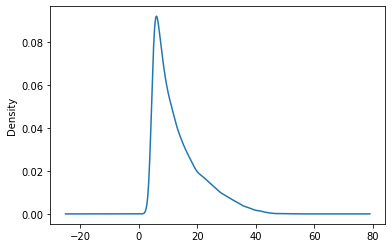

In [18]:
df_merge['Userid'].value_counts().plot.kde()

In [19]:
df_merge['Userid'].value_counts().describe()

count    33320.000000
mean        13.209874
std          8.084912
min          1.000000
25%          7.000000
50%         11.000000
75%         17.000000
max         53.000000
Name: Userid, dtype: float64

Text(0.5, 1.0, 'Top 10 users that listned more distinct songs')

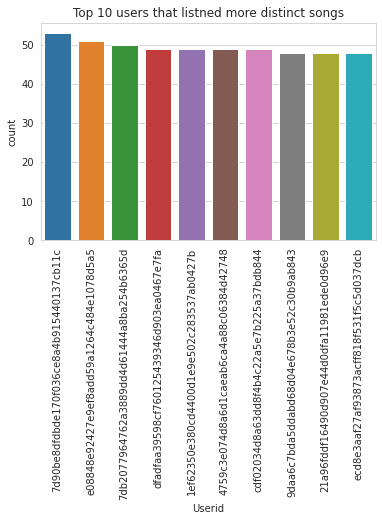

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Userid',data=df_merge,order=df_merge['Userid'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 users that listned more distinct songs")

# Top 5 users with maximum listens

Below are the Top five Users, that listned the Songs Most

In [21]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=False).head(5)

,Freq
Userid,
c6150292374fb1dad89982367b3245dd5004c718,1192.0
315103a41c2ced1143de0c2ba20de224800e6d89,1148.0
b51eeda3c09e2426f2e52dca8444a8c0cab6265a,1119.0
9d12c30de5d9975f621f95f512699989ac544410,1001.0
4bacaff23c6edf0cdec81b2a71e0b01df9341734,852.0


In [22]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=False).head(5).describe()

,Freq
count,5.000000
mean,1062.400000
std,137.263615
min,852.000000
25%,1001.000000
50%,1119.000000
75%,1148.000000
max,1192.000000


Text(0.5, 1.0, 'Top 10 Users that listned the Song more')

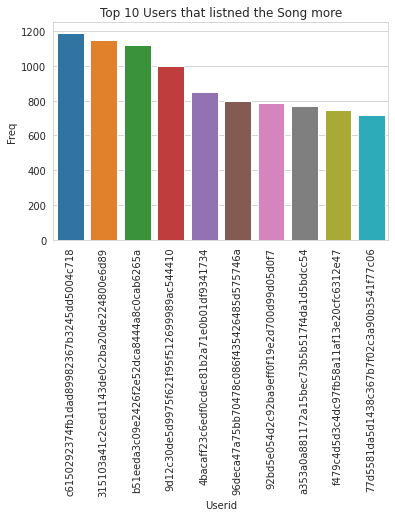

In [23]:
data=df_merge.groupby(['Userid'],sort=True).sum()
data=data.reset_index()
sns.barplot(x='Userid',y='Freq',data=data,   order=data.sort_values(['Freq'],ascending=False)['Userid'].iloc[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Users that listned the Song more")

# Last 5 users with minimum listens

Below are the Least Five Users that listned the Song less

In [24]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=True).head(5)

,Freq
Userid,
9eaedf5c861eb8ae71a5042,0.0
77812cc778c4c6c6eb65d937f527c12097299c74,5.0
95b836df5c449b275c24f1d5fce1ddf9b8cbb4ca,5.0
0638751d744e71957964759d9f39faac8daab960,5.0
eb062206b6e4b0d33a707b580138098e0b124870,5.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

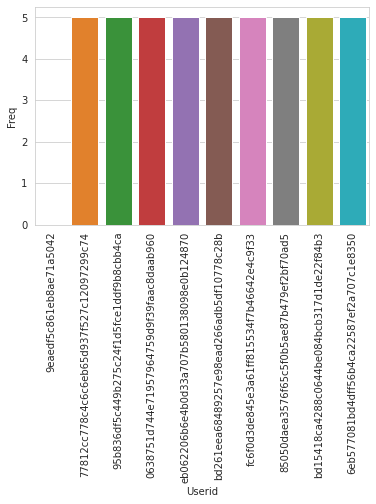

In [25]:
data=df_merge.groupby(['Userid'],sort=True).sum()
data=data.reset_index()
sns.barplot(x='Userid',y='Freq',data=data,   order=data.sort_values(['Freq'],ascending=True)['Userid'].iloc[:10])
plt.xticks(rotation=90)

# Popularity of Songs

most listened songs

In [26]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,Songid,count
22401,SOFRQTD12A81C233C0,1523
3231,SOAUWYT12A81C206F1,1377
6125,SOBONKR12A58A7A7E0,1287
71355,SOSXLTC12AF72A7F54,1161
3600,SOAXGDH12A8C13F8A1,1135


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

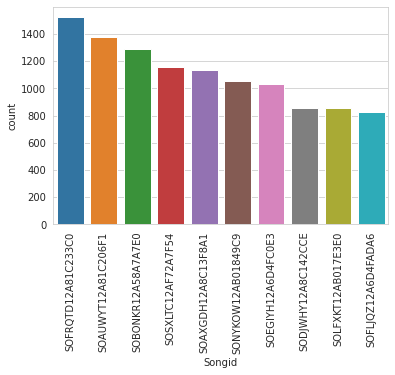

In [27]:
data =df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='Songid',y='count',data=data)
plt.xticks(rotation=90)

In [28]:
song_popularity=df_merge['Songid'].value_counts()

In [29]:
song_popularity

SOFRQTD12A81C233C0    1523
SOAUWYT12A81C206F1    1377
SOBONKR12A58A7A7E0    1287
SOSXLTC12AF72A7F54    1161
SOAXGDH12A8C13F8A1    1135
                      ... 
SOYUVYU12AB018156B       1
SOASONL12A6D4FB69F       1
SOTSRJV12A6D4F5241       1
SOEKGAJ12AC46882E6       1
SOFBDQB12A8C13E0A3       1
Name: Songid, Length: 95782, dtype: int64

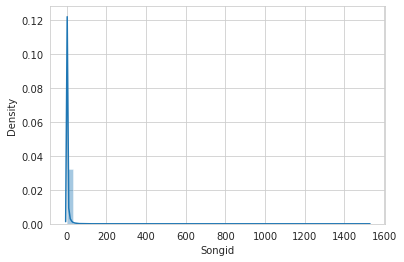

In [30]:
sns.distplot(song_popularity, hist=True, kde=True)

Below are the Last Five Least Listned Songs

In [31]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(5)

,Songid,count
95781,SOZZZRV12A8C1361F1,1
35176,SOJAIET12A58A79736,1
35177,SOJAIHU12A8C138C28,1
69440,SOSJMQM12A58A7CEE7,1
35179,SOJAITZ12AB0183618,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

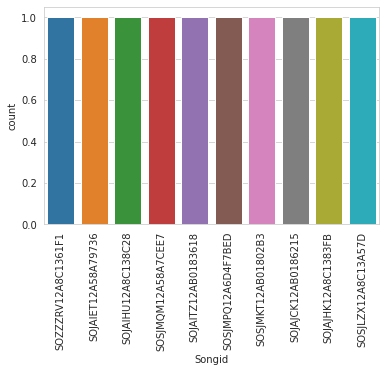

In [32]:
data =df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='Songid',y='count',data=data)
plt.xticks(rotation=90)

## Users with maximum no. of repeats for a particular song

In [33]:
df_merge[['Userid','Songid','Freq']].sort_values(['Freq'],ascending=False)

,Userid,Songid,Freq
364711,9d12c30de5d9975f621f95f512699989ac544410,SOFFXAQ12A8AE45C2E,535.0
178919,fa82c0a1a93b7c52870d7b0a004b444bbdf19401,SOCNAXF12A6D4F9B34,500.0
124979,388f7b7150bd020ce59b82603f7dd29f590ff8ed,SORJSQI12A6701D62D,478.0
186922,fbda29133162e205279fd1c49119ea0a28c163c1,SODWONG12A8C1421B3,476.0
83092,a72d150c16341e1849c40226eb0d322cadcf050d,SODCNEE12A6310E037,450.0
...,...,...,...
186245,d285fa271d5fe1d79a201d09fe99abd8f2971578,SOQCOII12A6D4F9216,1.0
186243,d285fa271d5fe1d79a201d09fe99abd8f2971578,SODKJWI12A8151BD74,1.0
186241,d285fa271d5fe1d79a201d09fe99abd8f2971578,SOSNYHM12A67ADAFC8,1.0
186240,d285fa271d5fe1d79a201d09fe99abd8f2971578,SONUPZD12A8C13981F,1.0


# Most Popular Artists

In [34]:
df_merge['ArtistName'].value_counts().sort_values()

Richi M.                     1
Molella                      1
Weinland                     1
Daniele Sepe                 1
Agnelli & Nelson             1
                          ... 
Alliance Ethnik           1205
Coldplay                  1417
Justin Bieber             1445
Björk                     1493
Florence + The Machine    2210
Name: ArtistName, Length: 12392, dtype: int64

In [35]:
popularity_artist=df_merge['ArtistName'].value_counts().sort_values()

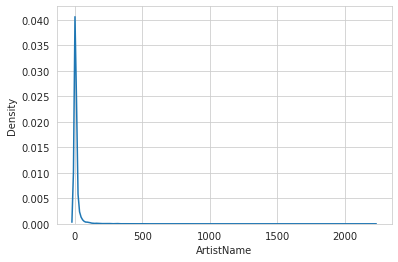

In [36]:
sns.kdeplot(popularity_artist)

In [37]:
df_merge[['ArtistName','Songid']].groupby('ArtistName').count().sort_values('Songid',ascending= False).head()

,Songid
ArtistName,
Florence + The Machine,2210
Björk,1493
Justin Bieber,1445
Coldplay,1417
Alliance Ethnik,1205


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

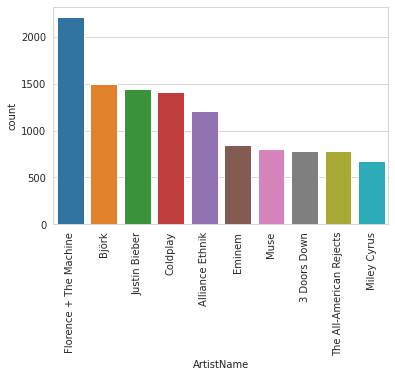

In [38]:
data =df_merge[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Least Popular Artists

In [39]:
df_merge[['ArtistName','Songid']].groupby('ArtistName').count().sort_values('Songid',ascending= True).head()

,Songid
ArtistName,
GEORGE SOULE,1
Sabrina Starke,1
Dobenbeck feat. Joanna,1
Kurt Elling,1
Kula Shaker,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

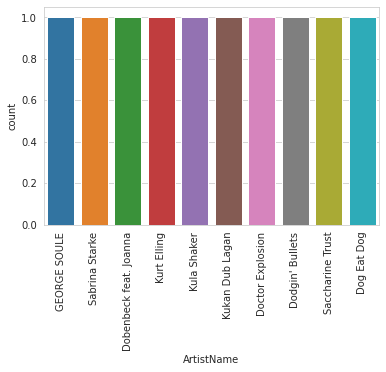

In [40]:
data =df_merge[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Artists with maximum songs released

In [41]:
df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName']).count().sort_values('Songid',ascending=False).head(5)

,Songid
ArtistName,
Johnny Cash,85
Ella Fitzgerald,78
Neil Diamond,75
Bob Dylan,73
Michael Jackson,73


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

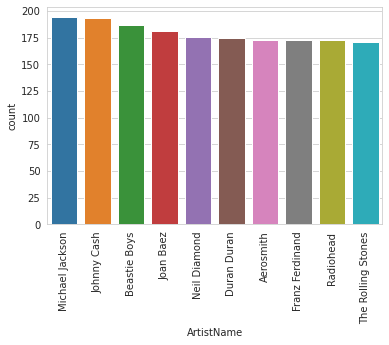

In [ ]:
data =df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Artists with minimum song released

In [ ]:
#Artist with Less songs

df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName']).count().sort_values('Songid',ascending=True).head(5)

,Songid
ArtistName,
"Little Louie"" Vega Feat. Arnold Jarvis",1
Greg Hawks & The Tremblers,1
Greg Edwards,1
Greg Davis_ Sébastien Roux,1
Greg Davis & Jeph Jerman,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

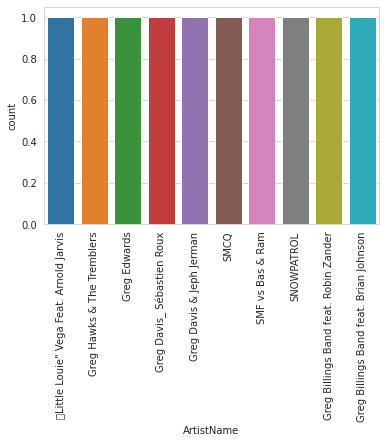

In [ ]:
data =df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

In [ ]:
#For my intrest, want to check the songs by Michael Jackson	
dt_m=df_uniquetrack[df_uniquetrack['ArtistName']=='Michael Jackson']
dt_m[dt_m[['Songid','Release']].duplicated()][['Songid','Release']].shape

(14, 2)

In [ ]:
df_uniquetrack[df_uniquetrack['Songid'].duplicated()]['Songid'].shape

(944,)

From the above it is Clear that we have 14 duplicate song id for Michael Jackson and 944 for all the songid's

In [ ]:
#For my intrest, want to check the songs by Michael Jackson	
dt_m=df_uniquetrack[df_uniquetrack['ArtistName']=='Michael Jackson']
dt_m[dt_m[['Trackid','Songid','Release']].duplicated()][['Trackid','Songid','Release']].shape

(0, 3)

So when considering the Track ID, we are getting the unique values, So let's see how many songs are mapped to each track

In [ ]:
df_uniquetrack[['Trackid','Songid','Release']].groupby('Songid').count().sort_values('Release',ascending=False).head()

,Trackid,Release
Songid,,
SOEHQBQ12A6D4F9EA9,3,3
SOPOCDY12A8C13F75A,3,3
SOEGQML12AF7299C84,3,3
SOBPAEP12A58A77F49,3,3
SOVSGJB12A8C13F772,3,3


So, From the above figures it is clear that 1 songid is mapped to multiple Track and release

In [ ]:
dt_m[['Songid']].value_counts()

Songid            
SOQUAIH12AB0181406    2
SOBKDCU12A6D4F80F6    2
SOWAEPK12A8C13543B    2
SOHZIPR12A8C1350D3    2
SOGHXZH12A8C1388B9    2
                     ..
SOPXWKJ12CF5F86F3D    1
SOPINQU12A58A7C781    1
SOPIHZM12CF5F89127    1
SOPAVVQ12CF58265C2    1
SOAKAEZ12A6D4F80E4    1
Length: 179, dtype: int64

Let's find how many songs are released in each Release

In [ ]:
df_uniquetrack[['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Untitled,Der Blutharsch,87
Hip-Hop Beats,Hip-Hop Beats,33
Untitled,7000 Dying Rats,31
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
...,...,...
Hey Jim,James Moody,1
Hey Jimmy,Los Natas,1
Hey Jimmy Freek,The Neptunas,1


In [ ]:
df_uniquetrack[df_uniquetrack['Release']=='Untitled']

,Trackid,Songid,ArtistName,Release
4145,TRMGVDK12903CB6FA7,SODNRCH12AB0185AD9,Der Blutharsch,Untitled
8449,TRMRJUC128F4275423,SOJXDWU12A8C13F636,Harry Pussy,Untitled
8730,TRMROOY128F9353E6B,SOUUXQO12AB0189A02,Mikaela's Fiend,Untitled
8976,TRMBMYF128F92C6D14,SOUPWRP12A58A77BE1,Jonezetta,Untitled
12025,TRMQHJD128F424A4FF,SOJJUDG12A8C1324EA,Robert Hood,Untitled
...,...,...,...,...
977117,TRYIZNU12903D04194,SONZPZO12AC468537A,Der Blutharsch,Untitled
983070,TRYTIVP128F42A4E3E,SOSYDPG12A8C13FD25,Agression,Untitled
993373,TRYDNMA12903CB6FD0,SOMCQFO12AB0186E41,Der Blutharsch,Untitled
995675,TRYXWAH128F934C318,SOZVEEA12AB018374C,Psyopus,Untitled


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_uniquetrack[df_uniquetrack['Release'] != 'Untitled'][['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Hip-Hop Beats,Hip-Hop Beats,33
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
Jana Gana Mana,AR Rahman,20
The Age Of Love,Age Of Love,20
...,...,...
Hey Hey (Rock On),The Hot Rocks,1
Hey Hey (Vampires Vs. Cheerleaders Mix),Superchick,1
Hey Hey Baby,Helen Humes,1


From above it is clear that in Hip Hop Beats release 33 Songs has released. (Excluding the Untitiled releases)

# EDA Summary

In our Exploratory Data Analysis of the given dataset, we have found the probability of users listening to an average of 13-20 songs is maximum and the average of distinct songs listened by different users is 13.56. The average number of songs listened in total is 1253.2 for the top 5 most active listeners. We have also observed that only a fraction of songs are likely to be popular. After further analysis, it was observed that the most popular artist was Coldplay with Yellow being the most favorite songs.We have also found that the data consists of some duplicate values in the column named 'Songid', which cause ambiguity in the dataset.  We have calculated and visualize different statistical parameters for the Dataset given.

# Model Building

 We mainly have 3 Types of Recommender Systems
1. Popularity Based
2. Collabrative Filterings
3. Content Based

### **Popularity Based Recommender System:**
As the name indicates, Popularity Based recommendation Systems are the type of recommendation system which works on the principle of popularity and or anything which is in trend. In Simple words, here we recommend the Songs that are more listened. 

This Mainly comes in picture when the user is new or if when we don't have more info about the users likes and dislikes. Here user based personalization is not available


---
#### Merits of popularity based recommendation system:

1.   It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
2.  There is no need for the user's historical data.

#### Demerits of popularity based recommendation system:

1. Not personalized 
2. The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.






### Long Tail Problem

The Long Tail is composed of a small number of popular items, the well-known hits, and the rest are located in the heavy tail, those not sell that well. Long-tail graph shows the distribution of popularity  among the songs in marketplace. There will be very less number of songs that will be more popular.

The distribution is shown below.

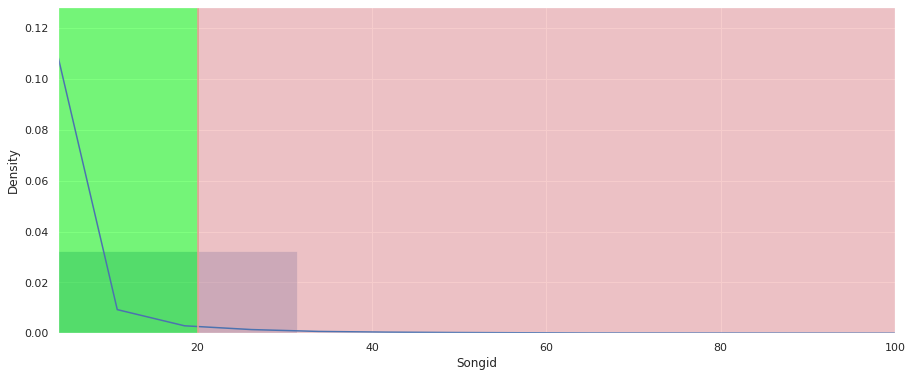

In [77]:
sns.set(rc={'figure.figsize':(15,6)})
splot=sns.distplot(song_popularity,  hist=True, kde=True,)
x0 = 20

splot.set(xlim=(4, 100))
xlim = splot.get_xlim()
splot.axvspan(xlim[0], x0, color='#00ff00', alpha=0.5)
splot.axvspan(x0, xlim[1], color='#EF9A9A', alpha=0.5)
p1 = plt.axvline(x=x0,color='#EF9A9A')

plt.show()


So, by using the Popularity based recommendation system, there is chance that the less popular songs will remain undiscovered.

In [95]:
df=song_popularity.to_frame()
df.reset_index(inplace=True)


In [112]:

df['Rank']=df['Songid'].rank(ascending=False)

In [115]:
df.sort_values("Songid",ascending=False)

,index,Songid,Rank
0,SOFRQTD12A81C233C0,1523,1.0
1,SOAUWYT12A81C206F1,1377,2.0
2,SOBONKR12A58A7A7E0,1287,3.0
3,SOSXLTC12AF72A7F54,1161,4.0
4,SOAXGDH12A8C13F8A1,1135,5.0
...,...,...,...
63940,SOOUBAQ12A81C20DB1,1,71905.0
63941,SOKOUUL12AB0187CD2,1,71905.0
63942,SOUJVNC12AB0184CCA,1,71905.0
63943,SOCKYPE12A8C1343B2,1,71905.0


**Popularity Based Recommender System Summmary:** So, If we use the Popularity based recommender System then the Songs that are ranked as above will be displayed as the top n suggestions to the user.